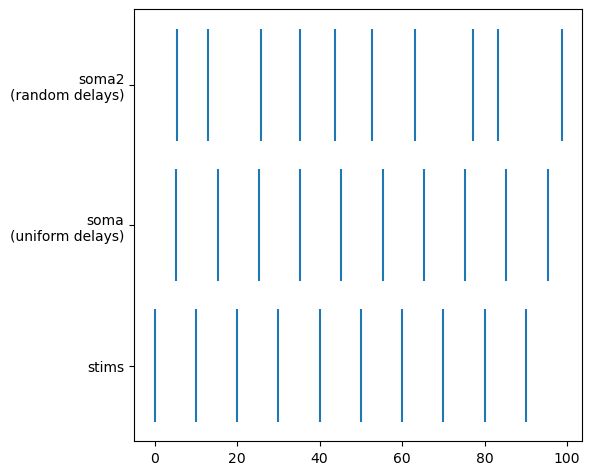

In [1]:
from neuron import h
from neuron.units import mV, ms, um
import spikedelayer as sd
import matplotlib.pyplot as plt

h.load_file("stdrun.hoc")

ns = h.NetStim()
ns.interval = 10
ns.start = 0
ns.noise = False
ns.number = 10

stim_t = h.Vector()
stim_id = h.Vector()

nc = h.NetCon(ns, None)
nc.record(stim_t, stim_id)

soma = h.Section(name="soma")
soma2 = h.Section(name="soma2")
h.hh.insert([soma, soma2])
soma2.L = soma2.diam = soma.L = soma.diam = 10 * um

nc2 = h.NetCon(soma(0.5)._ref_v, None, sec=soma)
nc2.record(stim_t, stim_id)
syn = h.ExpSyn(soma(0.5))

nc3 = h.NetCon(soma2(0.5)._ref_v, None, sec=soma2)
nc3.record(stim_t, stim_id)
syn2 = h.ExpSyn(soma2(0.5))

primary_nc1 = h.NetCon(ns, syn)
primary_nc1.weight[0] = 0.1
primary_nc1.delay = 5 * ms

primary_nc2 = sd.NetCon(ns, syn2)
primary_nc2.weight[0] = 0.1
primary_nc2.mean_delay = 5 * ms
primary_nc2.std_delay = 2 * ms

h.finitialize(-65 * mV)
h.continuerun(100 * ms)

# raster plot
plt.figure()
for i in range(int(max(stim_id) + 1)):
    plt.vlines([t for t, id_ in zip(stim_t, stim_id) if id_ == i],
            i - 0.4, i + 0.4)
plt.yticks([0, 1, 2])
ax = plt.gca()
ax.set_position([0.25, 0.05, 0.7, 0.9])
ax.set_yticklabels(["stims", "soma\n(uniform delays)", "soma2\n(random delays)"])
plt.show()
